# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [92]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [93]:
# Your code here.
data = {'Age': ["17", "51", "27", "21", "36","48", "19","26","54","30"],
        'Tardies': ["10", "1", "5", "9", "4","2", "9","6","0","3"]}
student_data = pd.DataFrame(data)
student_data=student_data.sort_values(['Age'])
student_data.dtypes

Age        object
Tardies    object
dtype: object

In [94]:
student_data[['Age', 'Tardies']] = student_data[['Age', 'Tardies']].apply(pd.to_numeric) 
print(student_data.dtypes) 

Age        int64
Tardies    int64
dtype: object


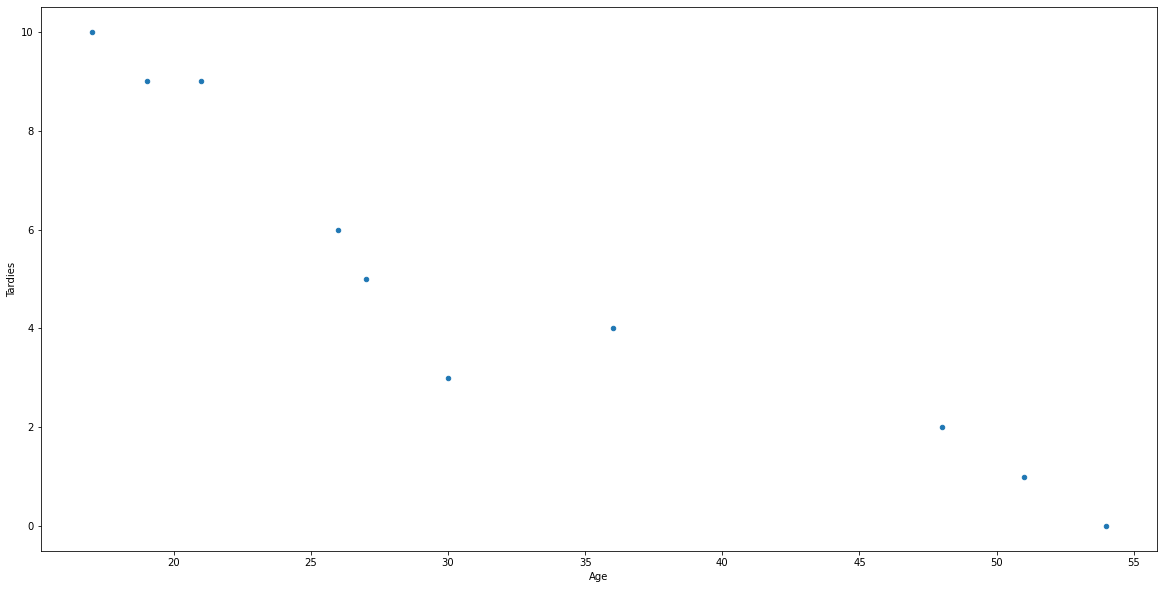

In [95]:
student_data.plot.scatter(x="Age", y = "Tardies")

Draw a dispersion diagram (scatter plot) for the data.

In [96]:
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm

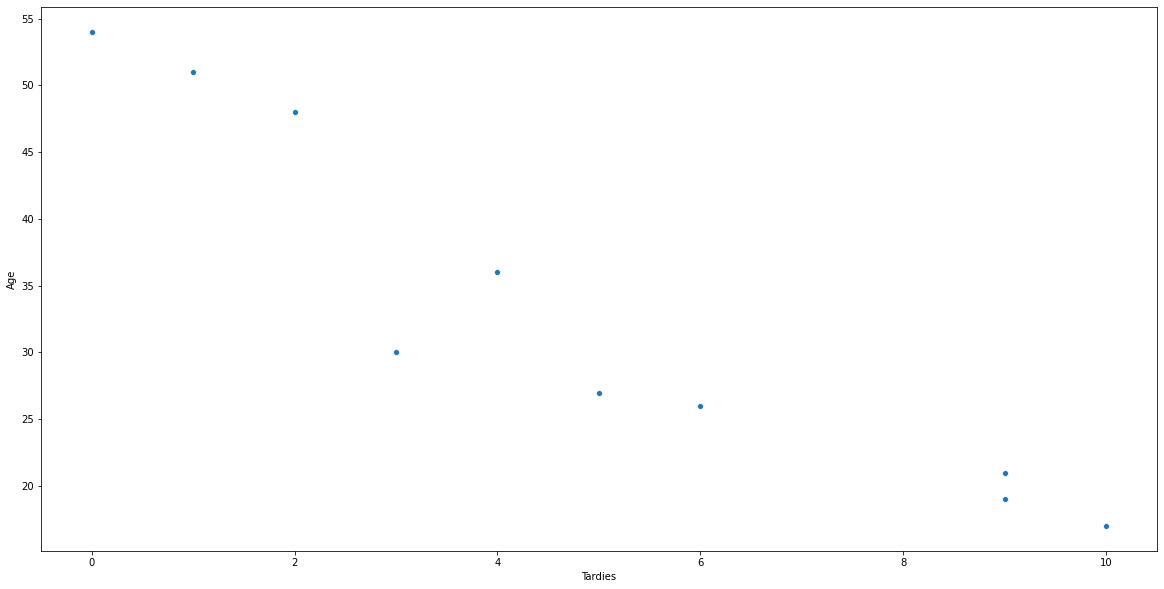

In [97]:
sns.scatterplot(data=student_data, x="Tardies", y="Age")

In [98]:
y = student_data['Tardies']
x = sm.add_constant(student_data['Age'])

mod = sm.OLS(y, x)
results = mod.fit()
results.summary()

/Users/marc/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           5.57e-05
Time:                        18:39:04   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [99]:
# Your response here. 
# Yes, if the people are younger, they have more tardies

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [100]:
#correlation:
print(student_data.corr())
#covariance:
print(student_data.cov())
#Age goes up (pos. cov), tardies go down (neg. cov)

              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000
                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [101]:
# Your response here.
#[Tardies] = b0 + b1*[Age]
#linear regression

In [102]:
from scipy import stats

In [103]:
X =  student_data["Age"]
Y =  student_data["Tardies"]
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ("The slope is: " + str(slope))
print ("The intercept is: " + str(intercept))

The slope is: -0.24282077091598087
The intercept is: 12.888803363135771


Plot your regression model on your scatter plot.

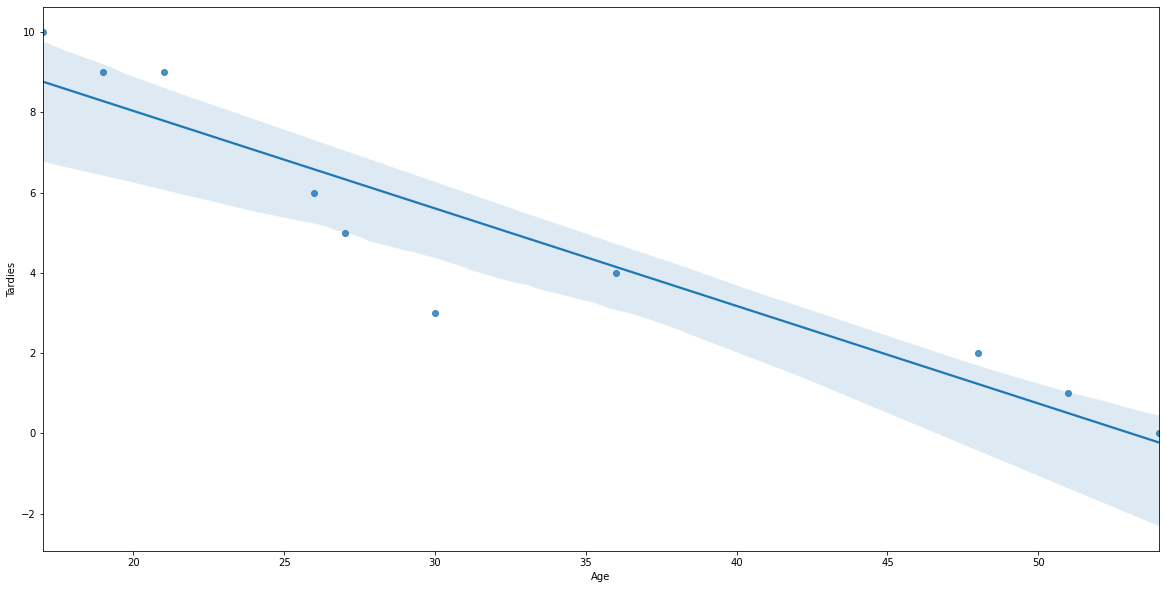

In [104]:
# Your code here.
sns.regplot(X,Y)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [105]:
import matplotlib.pyplot as plt

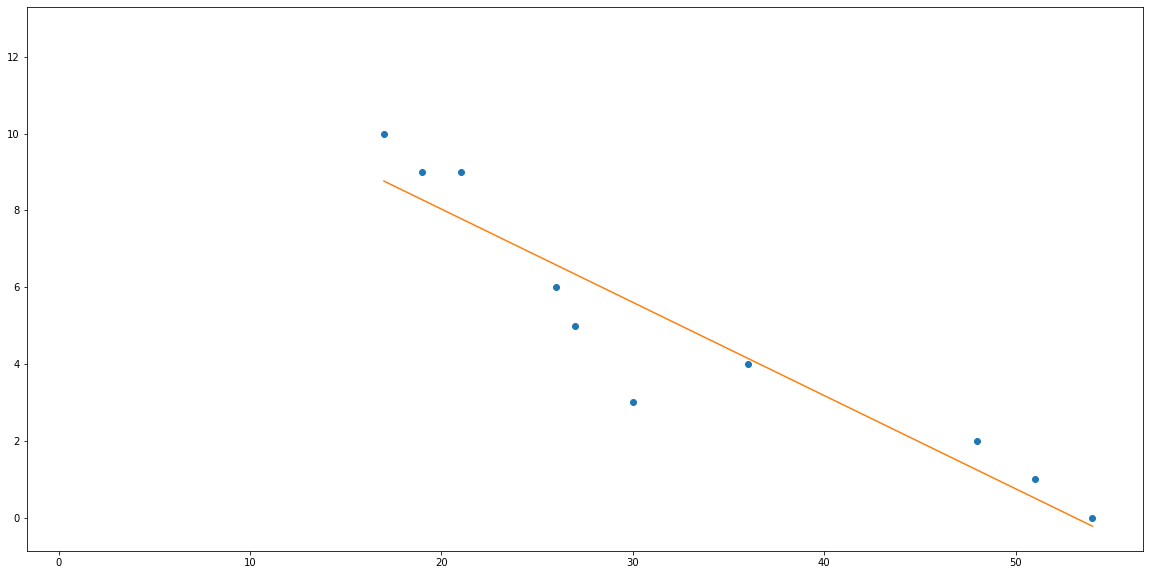

In [106]:
# Your response here. 
regression_line = slope * X + intercept
plt.scatter(X,Y)
plt.plot(x, slope*x+intercept)

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [107]:
# Import any libraries you may need & the data
df= pd.read_csv('vehicles.csv')  

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [108]:
# Your response here. 
column_1 = df["Year"]
column_2 = df["CO2 Emission Grams/Mile"]
correlation = column_1.corr(column_2)
print(correlation)

-0.22229960295054238


In [109]:
column_1 = df["Cylinders"]
column_2 = df["CO2 Emission Grams/Mile"]
correlation = column_1.corr(column_2)
print(correlation)

0.7523925537297486


In [110]:
column_1 = df["Fuel Barrels/Year"]
column_2 = df["CO2 Emission Grams/Mile"]
correlation = column_1.corr(column_2)
print(correlation)

#A perfect uphill (positive) linear relationship

0.9861886621428727


In [111]:
column_1 = df["Combined MPG"]
column_2 = df["CO2 Emission Grams/Mile"]
correlation = column_1.corr(column_2)
print(correlation)

#A perfect downhill (negative) linear relationship

-0.9262290389336443


In [112]:
column_1 = df["Fuel Cost/Year"]
column_2 = df["CO2 Emission Grams/Mile"]
correlation = column_1.corr(column_2)
print(correlation)

#A perfect uphill (positive) linear relationship

0.9308651512201844


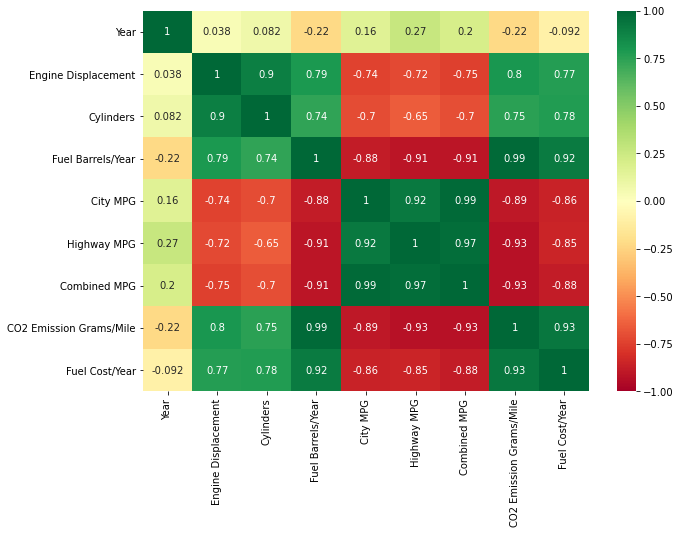

In [113]:
fig, ax = plt.subplots(figsize = (10,7))
sns.heatmap(df.corr(), cmap = plt.cm.RdYlGn, ax = ax, vmin = -1, vmax = 1, annot=True);

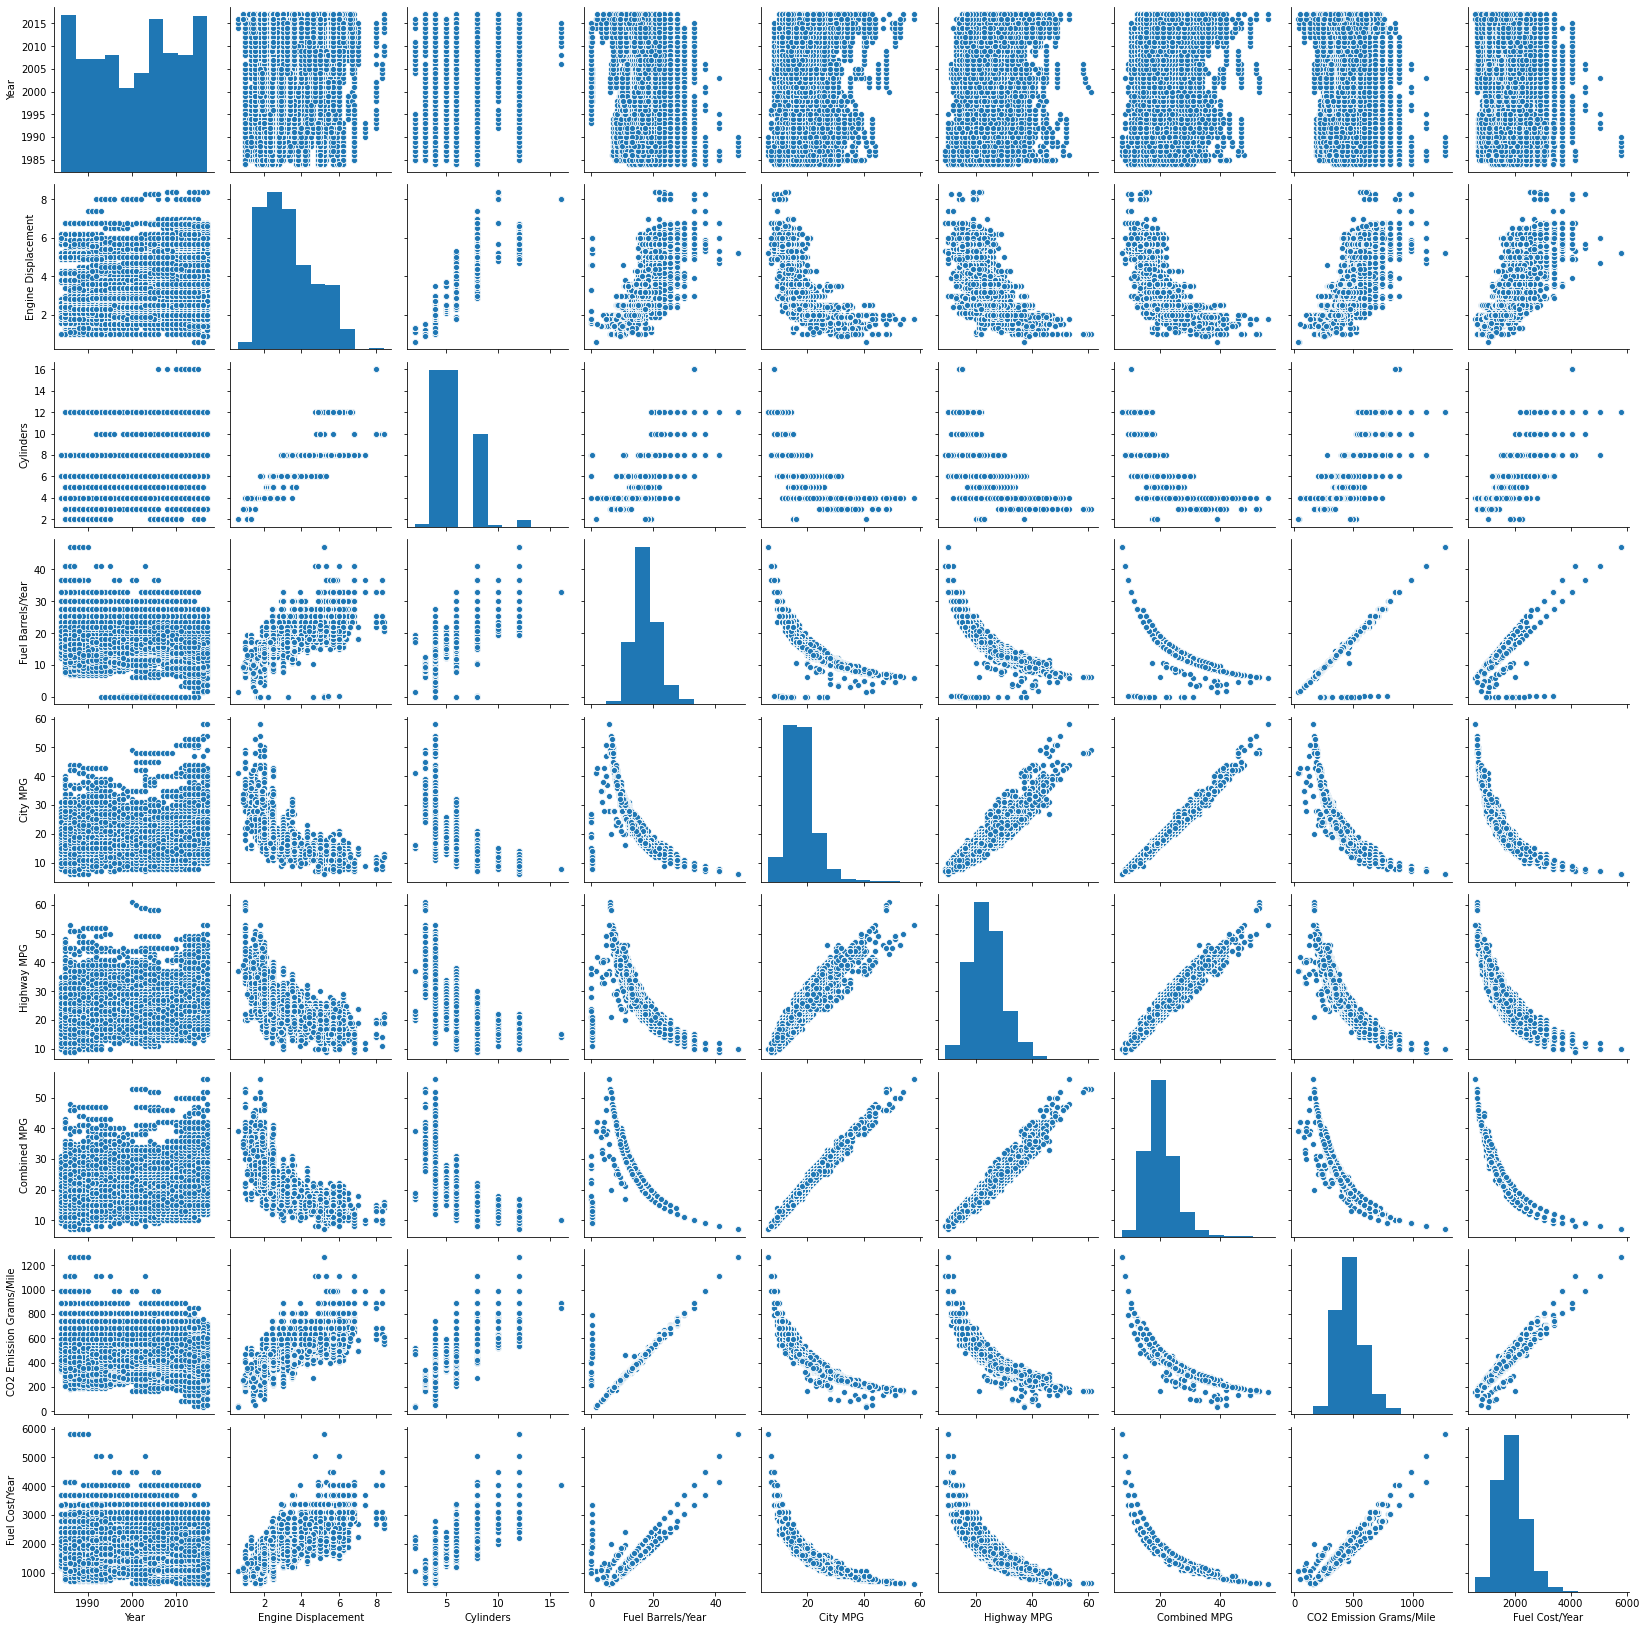

In [114]:
plt.rcParams['figure.figsize'] = (20,10)
sns.pairplot(df)

In [115]:
from sklearn import linear_model
from termcolor import colored as cl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [116]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [117]:
df.describe()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
count,35952.00000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,2000.71640,3.338493,5.765076,17.609056,17.646139,23.880646,19.929322,475.316339,1892.598465
std,10.08529,1.359395,1.755268,4.467283,4.769349,5.890876,5.112409,119.060773,506.958627
min,1984.00000,0.600000,2.000000,0.060000,6.000000,9.000000,7.000000,37.000000,600.000000
25%,1991.00000,2.200000,4.000000,14.699423,15.000000,20.000000,16.000000,395.000000,1500.000000
50%,2001.00000,3.000000,6.000000,17.347895,17.000000,24.000000,19.000000,467.736842,1850.000000
75%,2010.00000,4.300000,6.000000,20.600625,20.000000,27.000000,23.000000,555.437500,2200.000000
max,2017.00000,8.400000,16.000000,47.087143,58.000000,61.000000,56.000000,1269.571429,5800.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [118]:
# Your response here. 
X = df[["Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = df["CO2 Emission Grams/Mile"]

regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# multipile linear regression - because there are more fitting columns with nearly -1 and 1 as corr

Intercept: 
 131.6741718422752
Coefficients: 
 [19.69545749 -3.166074    0.03166095]


In [119]:
sm_X1_var = sm.add_constant(X)

mlr_model = sm.OLS(y, sm_X1_var)
mlr_reg = mlr_model.fit()
print(cl(mlr_reg.summary(), attrs = ['bold']))

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.980
Model:                                 OLS   Adj. R-squared:                  0.980
Method:                      Least Squares   F-statistic:                 5.932e+05
Date:                     Tue, 19 Jan 2021   Prob (F-statistic):               0.00
Time:                             18:39:27   Log-Likelihood:            -1.5235e+05
No. Observations:                    35952   AIC:                         3.047e+05
Df Residuals:                        35948   BIC:                         3.047e+05
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
print(cl('R-Squared :', attrs = ['bold']), lr.score(X_test, y_test))

R-Squared : 0.9826407994986057


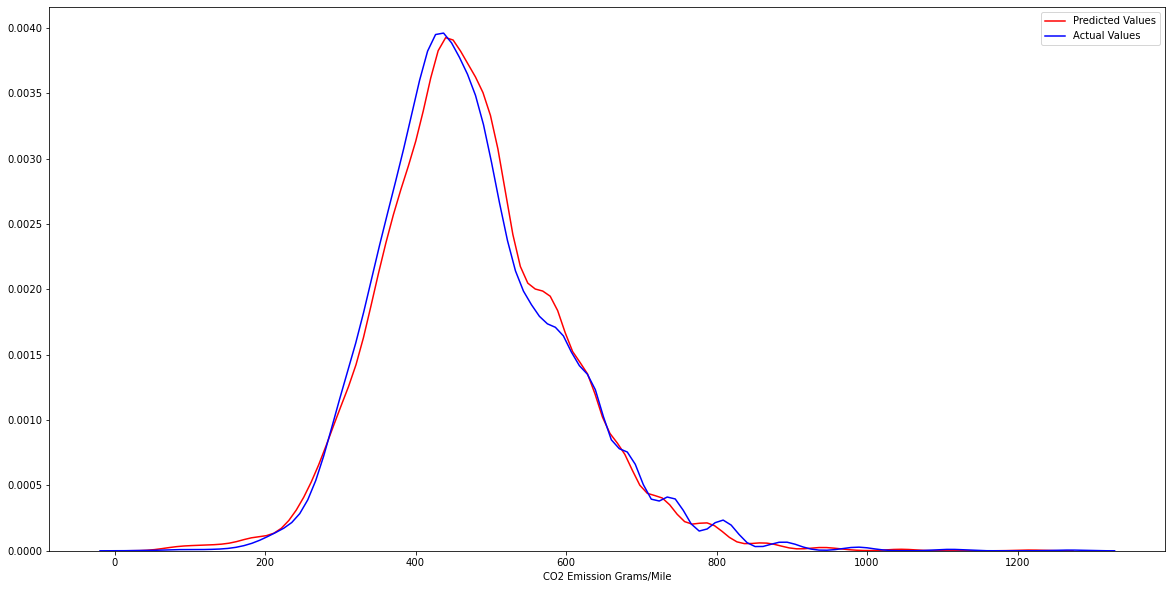

In [121]:
sns.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [122]:
# Your response here. 
#R squared is 0,98 - near to 1 - that means mostly perfect fitting

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [123]:
# Your code here.
data1 = {'X': ["1", "3", "4", "6", "8","9", "11","14"],
        'Y': ["1", "2", "4", "4", "5","7", "8","13"]}
data1 = pd.DataFrame(data1)
data1.dtypes
data1

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [124]:
data1[['X', 'Y']] = data1[['X', 'Y']].apply(pd.to_numeric) 
print(data1.dtypes) 

X    int64
Y    int64
dtype: object


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

The slope is: 0.8484848484848485
The intercept is: -0.43939393939393945


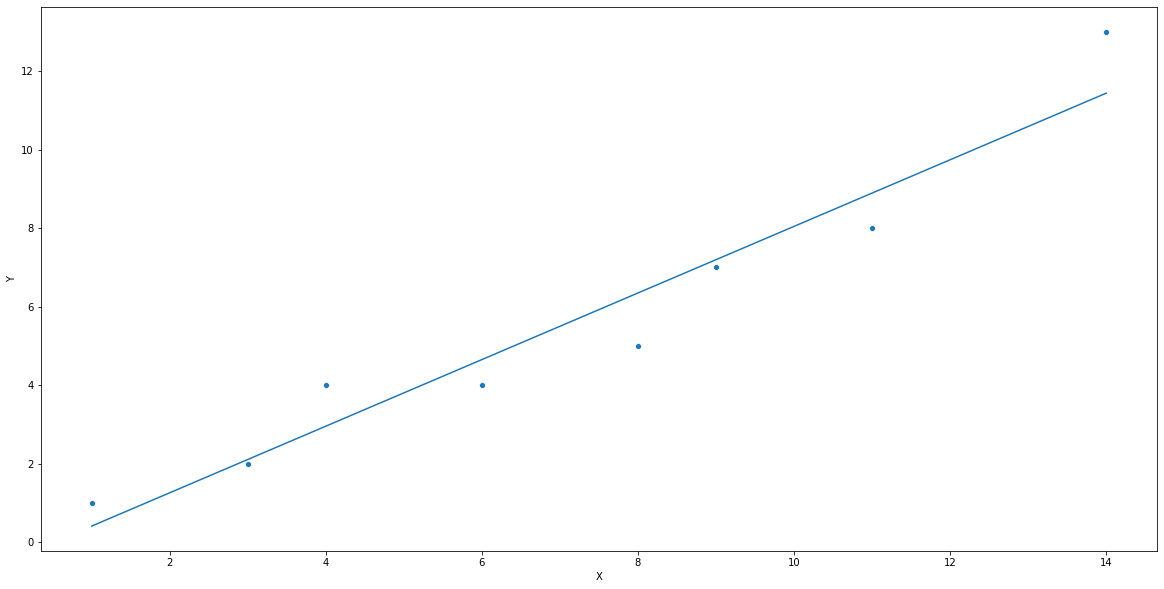

In [125]:
# Your code here.
sns.scatterplot(data=data1, x="X", y="Y")
X =  data1["X"]
Y =  data1["Y"]
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ("The slope is: " + str(slope))
print ("The intercept is: " + str(intercept))
regression_line = slope * X + intercept
plt.plot(X, regression_line)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [126]:
# Your response here. 
y = data1['X']
x = sm.add_constant(data1['Y'])

mod = sm.OLS(y, x)
results = mod.fit()
results.summary()

# R-Squared is near by 1 - linear regression fits really well

/Users/marc/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           0.000102
Time:                        18:39:28   Log-Likelihood:                -11.831
No. Observations:                   8   AIC:                             27.66
Df Residuals:                       6   BIC:                             27.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9608      0.796      1.207      0.273      -0.987       2.909
Y              1.0980      0.121      9.045      0.000       0.801       1.395
==============================================================================
Omnibus:                        1.930   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                0.742
Skew:                           0.048   Prob(JB):                        0.690
Kurtosis:                       1.511   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [127]:
# Your response here. 
data1 = data1.drop([2, 7])

The slope is: 0.7149532710280374
The intercept is: -0.028037383177569986


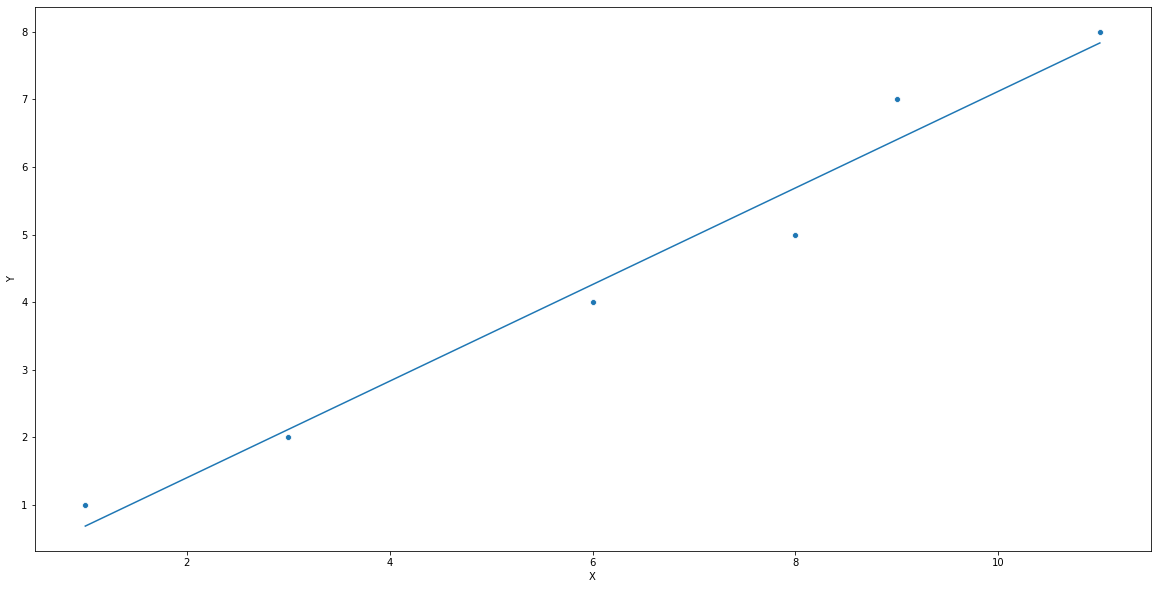

In [128]:
sns.scatterplot(data=data1, x="X", y="Y")
X =  data1["X"]
Y =  data1["Y"]
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ("The slope is: " + str(slope))
print ("The intercept is: " + str(intercept))
regression_line = slope * X + intercept
plt.plot(X, regression_line)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [80]:
# Your response here. 
y = data1['X']
x = sm.add_constant(data1['Y'])

mod = sm.OLS(y, x)
results = mod.fit()
results.summary()

/Users/marc/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     140.6
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           0.000290
Time:                        18:17:15   Log-Likelihood:                -5.1775
No. Observations:                   6   AIC:                             14.36
Df Residuals:                       4   BIC:                             13.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2133      0.590      0.361      0.736      -1.426       1.853
Y              1.3600      0.115     11.857      0.000       1.042       1.678
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.162
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.342
Skew:                           0.370   Prob(JB):                        0.843
Kurtosis:                       2.095   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""